In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import pandas as pd
import pickle
from PIL import Image
import matplotlib.pyplot as plt
import os

from Butterfly_identification.preprocessbutterfly import get_data, feature_engineering

2021-09-02 11:28:42.885967: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.4/lib64
2021-09-02 11:28:42.885990: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
our_model = load_model('../raw_data/Docker/2-RES-STYLE/')

2021-09-02 11:28:44.775799: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2021-09-02 11:28:44.775838: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: schiryn-GL62M-7RDX
2021-09-02 11:28:44.775845: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: schiryn-GL62M-7RDX
2021-09-02 11:28:44.776024: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.57.2
2021-09-02 11:28:44.776077: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.57.2
2021-09-02 11:28:44.776082: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.57.2
2021-09-02 11:28:44.776319: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in per

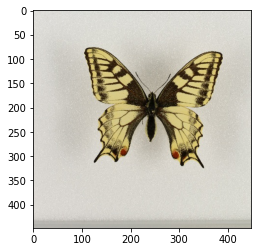

In [34]:
img = plt.imread('../../ETHZ_ENT01_2017_03_20_004642.JPG')
plt.imshow(img)

In [35]:
def prepare_image (img): 
    img = preprocess_input(img)
    img = np.expand_dims(img,axis = 0)
    return img
img = prepare_image(img)

In [36]:
assert img.shape[0] == 1
resultat = pd.DataFrame(our_model.predict(img)).T
# Load prediction table of species
infile = open("../../species_table",'rb')
table = pickle.load(infile)
# merge result and total
table = pd.DataFrame(table).reset_index(drop = True)
total = resultat.merge(table, right_index=True, left_index=True)
total.columns = ['score', 'species']
#= Créer la table de correspondance avec les noms communs
table_nom_commun = pd.read_json('../raw_data/Docker/table_commun.json')
table_nom_commun = table_nom_commun.replace(' ', '_', regex = True)
table_nom_commun.columns = ['species', 'nom_commun']

# Affiche la table de prédiction
table_pred = total.merge(table_nom_commun, how = 'left', on = 'species')

total_sort = table_pred.sort_values(ascending=False, by = 'score').head(5)

In [42]:
total_sort.iloc[0,2]

nan

In [44]:
if total_sort.iloc[0,2] != np.nan:
    print('AH')

AH


In [37]:
total_sort

,score,species,nom_commun
20,0.999121,Parnassius_sacerdos,NaN
60,0.000760,Minois_dryas,"Grand_Nègre_des_bois_(Le),_Dryade_(La)"
140,0.000100,Apatura_iris,"Grand_mars_changeant_(Le),_Grand_Mars_(Le),_Ch..."
24,0.000009,Coenonympha_pamphilus,"Fadet_commun_(Le),_Procris_(Le),_Petit_Papillo..."
52,0.000008,Aricia_artaxerxes,"Argus_de_l'Hélianthème_(L'),_Argus_marron_(L')"


# Prediction transformer

## Add table_nom_commun

In [13]:
table

,species
0,Parnassius_apollo
1,Pieris_napi
2,Polyommatus_icarus
3,Plebejus_idas
4,Melitaea_athalia
...,...
223,Colias_wiskotti
224,Parnassius_stubbendorfii
225,Parnassius_charltonius
226,Euphydryas_maturna


In [9]:
#= Créer la table de correspondance avec les noms communs
table_nom_commun = pd.read_json('../raw_data/Docker/table_commun.json')
table_nom_commun = table_nom_commun.replace(' ', '_', regex = True)
table_nom_commun.columns = ['species', 'nom_commun']

# Affiche la table de prédiction
table_pred = total.merge(table_nom_commun, how = 'left', on = 'species')

In [11]:
table_pred

,score,species,nom_commun
0,2.826212e-10,Parnassius_apollo,"Apollon_(L'),_Parnassien_apollon_(Le)"
1,1.500920e-07,Pieris_napi,"Piéride_du_Navet_(La),_Papillon_blanc_veiné_de..."
2,1.372033e-11,Polyommatus_icarus,"Azuré_de_la_Bugrane_(L'),_Argus_bleu_(L'),_Azu..."
3,1.557901e-09,Plebejus_idas,"Azuré_du_Genêt_(L'),_Argus_sagitté_(L'),_Bleu-..."
4,9.097904e-11,Melitaea_athalia,"Mélitée_du_Mélampyre_(La),_Damier_Athalie_(Le)"
...,...,...,...
223,2.941815e-12,Colias_wiskotti,NaN
224,8.523147e-08,Parnassius_stubbendorfii,NaN
225,1.061993e-12,Parnassius_charltonius,NaN
226,1.460266e-11,Euphydryas_maturna,NaN


## Return prediction

In [12]:
total_sort

,score,species
28,9.999923e-01,Araschnia_levana
101,2.593189e-06,Limenitis_camilla
161,1.915213e-06,Lycaena_helle
60,1.563765e-06,Minois_dryas
76,6.738074e-07,Erebia_montana


In [ ]:
prediction = total_sort.set_index('species', drop = True).to_dict()['score']

In [ ]:
def get_prediction_pictures(species, path = '../raw_data/Docker/'):
    ''' This function take one species, the path of the photos folder and the number of photos to return and create a pickle file with the number of photos by species and return the path of this pickle file'''
    new_path = path + 'Photos/' + species
    all_photos = os.listdir(new_path)
    file = open(path + 'Pickle/' + f'pickle_{species}.pkl','wb')
    dico = {}
    for num, name_path in enumerate(all_photos) :
        img = Image.open(new_path + '/' + name_path)
        dico[num] = img
    pickle.dump(dico,file)
    file.close()
    return path + 'Pickle/' + f'pickle_{species}.pkl'

In [ ]:
get_prediction_pictures('Parnassius_apollo')

In [ ]:
dico = {}
for i in prediction.keys():
    nom_latin = i
    pkl_files = get_prediction_pictures(i)
    dico[prediction[i]] = (nom_latin, pkl_files)
dico

*iterlique

In [ ]:
pkl_file = open(dico[0.8924148678779602][1], 'rb')
image = pickle.load(pkl_file)
pkl_file.close()
image

In [ ]:
plt.imshow(image[0])

In [ ]:
image = []
for i in dico.keys():
    pkl_file = open(dico[i][1], 'rb')
    image.append(pickle.load(pkl_file))
    pkl_file.close()
image

# Modifier le dossier

A partir du dossier (3 images par espèce), faire une fonction qui prend les espèces retenu de la prédiction et qui ressort les images ou un pickle avec les images

In [ ]:
plt.imshow(plt.imread('/home/schiryn/code/Em3line/Butterfly_identification/raw_data/IMG_labels/Train/Pieris_mannii/ETHZ_ENT01_2017_04_03_010561.JPG'))

# API 

In [ ]:
from io import BytesIO
uploaded_file = open('../raw_data/20180815_110738.jpg')
file = BytesIO(uploaded_file.read())
content = file.read()
image = Image.open(BytesIO(content)).convert("RGB")
uploaded_file.close()

# Fonction

A partir du dossier (3 images par espèce), faire une fonction qui prend les espèces retenu de la prédiction et qui ressort les images ou un pickle avec les images

In [ ]:
path + 'Parnassius_apollo'
os.listdir(new_path)

In [ ]:
path = '/home/schiryn/code/Em3line/Butterfly_identification/raw_data/Docker/Photos/'

In [ ]:
import pickle
import os
# Entree
def get_pickle_images(species,path = '/home/schiryn/code/Em3line/Butterfly_identification/raw_data/Docker/',number = 3):
    ''' This function take one species, the path of the photos folder and the number of photos to return and
    create a pickle file with the number of photos by species and return the path of this pickle file'''
    new_path = path + 'Photos/' + species
    all_photos = os.listdir(new_path)
    file = open(path + 'Pickle/' + f'pickle_{species}.pkl','wb')
    dico = {}
    for num, name_path in enumerate(all_photos) :
        img = Image.open(new_path + '/' + name_path)
        dico[num] = img
    pickle.dump(dico,file)
    file.close()
    return path + 'Pickle/' + f'pickle_{species}.pkl'
        
        
# Voir à faire un fonction qui vide le dossier Pickle ?
# if f'pickle_{species}.pkl' existe :
# pickle.load
# else 
# pkl_path = get_pickle_images()
# file = open(pkl_path,'wb')
# pickle.load(file)
# file.close()

In [ ]:
all_photos

In [ ]:
for num, paths in enumerate(all_photos):
    print(num, paths)

In [ ]:
pkl_file = open('pickle_to_suppr.pkl', 'rb')
image = pickle.load(pkl_file)
pkl_file.close()

In [ ]:
for i in image :
    plt.subplot(1,len(image),i+1)
    fig = plt.imshow(image[i])
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

In [ ]:
all_photos[:1]

## Prediction

In [ ]:
total_sort

## Get data

In [ ]:
df_train, df_val, df_test = preproc.get_data(data=["train", "val", "test"])
print(">>>>>>>>>>>>>>>>>>>>>>>>        Data loaded        <<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
df_train, df_val, df_test = preproc.feature_engineering(df_train, df_val, df_test)
print(">>>>>>>>>>>>>>>>>>>>>>>>      Preprocess done      <<<<<<<<<<<<<<<<<<<<<<<<<<<<<")

## Select pictures (n photos from n species)

In [ ]:
df = df_train
data_to_sample = df.loc[df['species'] == 'Parnassius_apollo', 'image_path']
data_to_sample = '../raw_data/Docker/Photos/' + data_to_sample

In [ ]:
plt.imread(Image.open(data_to_sample[10]))

In [ ]:
species = 'Parnassius_apollo'
df = df_train
data_to_sample = df.loc[df['species'] == species, 'image_path']
data_to_sample = '../raw_data/IMG_labels/Train/' + data_to_sample
sampling = data_to_sample.sample(3)

In [ ]:
sampling[0]

In [ ]:
plt.imshow(Image.open(sampling[0]))

In [ ]:
def find_picture(species, df, nb_image = 3):
    data_to_sample = df.loc[df['species'] == species, 'image_path']
    data_to_sample = '../raw_data/IMG_labels/Train/' + data_to_sample
    sampling = data_to_sample.sample(nb_image)
    fig, ax = plt.subplots(figsize=(7, 3))
    for i,j in enumerate(sampling) :
        plt.subplot(1,len(sampling),i+1)
        img = Image.open(j)
        fig = plt.imshow(img)
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
    return fig

In [ ]:
def find_picture(species, df, nb_image = 3):
    data_to_sample = df.loc[df['species'] == species, 'image_path']
    fig, ax = plt.subplots(figsize=(7, 3))
    for i,j in enumerate(data_to_sample) :
        plt.subplot(1,len(sampling),i+1)
        img = Image.open('../raw_data/IMG_labels/'j)
        fig = plt.imshow(img)
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
    return fig

In [ ]:
df_train, df_val, df_test = get_data()
df_train, df_val, df_test = feature_engineering(df_train, df_val,df_test)

In [ ]:
img = Image.open('../raw_data/IGM_labels/Train/Parnassius_apollonius/ETHZ_ENT01_2018_03_12_133969.JPG')

In [ ]:
plt.imshow(img)

In [ ]:
for i in total_sort['species']:
    find_picture(i, df_train, 1)

In [ ]:
image = Image.open(BytesIO(content)).convert('RGB')

# Pickle

In [ ]:
import pickle
file = open('model.pkl','wb')
pickle.dump(images_predict, file)
file.close()